# Get the data

In [82]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import requests
from pathlib import Path
response=requests.get('https://raw.githubusercontent.com/ageron/data/main/housing/housing.csv')
if Path('housing.csv').is_file(): #if file already exists
    pass 
else:
    print("Downloading file...")
    with open("housing.csv","wb") as f:
        f.write(response.content)

housing=pd.read_csv('housing.csv')


In [83]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [84]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [85]:
housing.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [86]:
housing.describe()#summary of numerical attributes

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


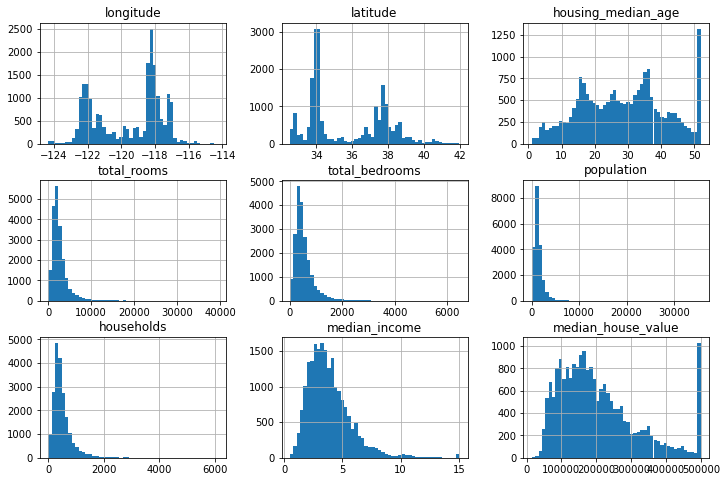

In [87]:
housing.hist(bins=50,figsize=(12,8))
plt.show()

# Split the data

Our earlier visualisations have shown us that the dataset we are using is imbalanced, some classes of features
are represented better than others

In [88]:
from sklearn.model_selection import train_test_split
train_set,test_set=train_test_split(housing,test_size=0.2,random_state=42)

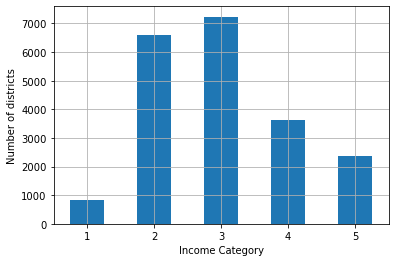

In [89]:
#make income categories for stratified sampling
housing['income_cat']=pd.cut(housing['median_income'],bins=[0,1.5,3.0,4.5,6.0,np.inf],labels=[1,2,3,4,5])
housing['income_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel("Income Category")
plt.ylabel("Number of districts")
plt.show()

In [90]:
from sklearn.model_selection import StratifiedShuffleSplit
#The imported class' split() iterable returns an iterator of train and test indices
splitter=StratifiedShuffleSplit(n_splits=10,test_size=0.2,random_state=42)
strat_splits=[]
for train_index,test_index in splitter.split(housing,housing['income_cat']):#(X,y) stratification is done based on y    
        strat_train_split=housing.iloc[train_index]
        strat_test_split=housing.iloc[test_index]
        strat_splits.append([strat_train_split,strat_test_split])


In [91]:
proportions=[]
for index,train_test_split in enumerate(strat_splits):
    strat_train_set,strat_test_set=train_test_split
    train_proportions=strat_train_set.income_cat.value_counts()/len(strat_train_set)
    test_proportions=strat_test_set.income_cat.value_counts()/len(strat_test_set)
    proportions.append([train_proportions,test_proportions])
#     print(f"Split : {index}")
#     print(f"Train set proportions : {strat_train_set.income_cat.value_counts()/len(strat_train_set)}")
#     print(f"Test set proportions : {strat_test_set.income_cat.value_counts()/len(strat_test_set)}")


In [92]:

# plt.title("Train set proportions")
# plt.bar(proportions)
proportions[0][0].values

array([0.35059351, 0.31885901, 0.17629603, 0.11446221, 0.03978924])

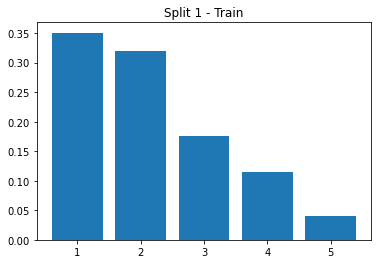

In [93]:
plt.subplots(5,2)
plt.subplot(1,1,1)
plt.title("Split 1 - Train")
plt.bar(height=proportions[0][0].values,x=[1,2,3,4,5])
plt.show()

### Since stratified sampling is so common, the train_test_split method has an argument for the same

In [94]:
from sklearn.model_selection import train_test_split
strat_train_set,strat_test_set=train_test_split(housing,test_size=0.2,random_state=42,stratify=housing.income_cat)

In [95]:
strat_test_set.income_cat.value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [96]:
strat_test_set.drop("income_cat",axis=1,inplace=True)
strat_train_set.drop("income_cat",axis=1,inplace=True)

# Explore the data

In [97]:
#explore only the train set to avoid data snooping bias
housing=strat_train_set.copy()


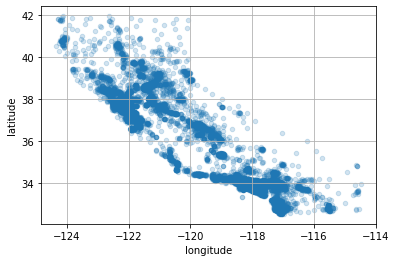

In [98]:
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2)
plt.show()

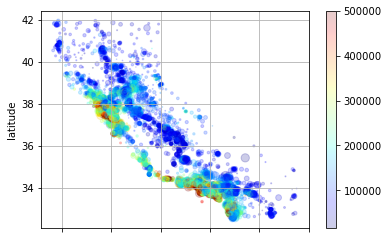

In [99]:
#make a prettier plot
housing.plot(kind="scatter",x="longitude",y="latitude",grid=True,alpha=0.2,s=housing.population/100,
            c=housing.median_house_value,cmap="jet")
plt.show()

In [100]:
#correlation matrix
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

The correlation coefficient ranges from -1 to 1. A number close to -1 means that there is a negative linear correlation between the two features. i.e As one increases, the other decreases.
As the correlation coefficient gets close to 0, there is no linear correlation


The pandas' scatter_matrix() function plots scatter plots of each numerical attribute against the other. Since with 10 attributes the plots wouldn't fit on a typical laptop screen, we pick the most correlated attributes from the values in the correlation matrix above

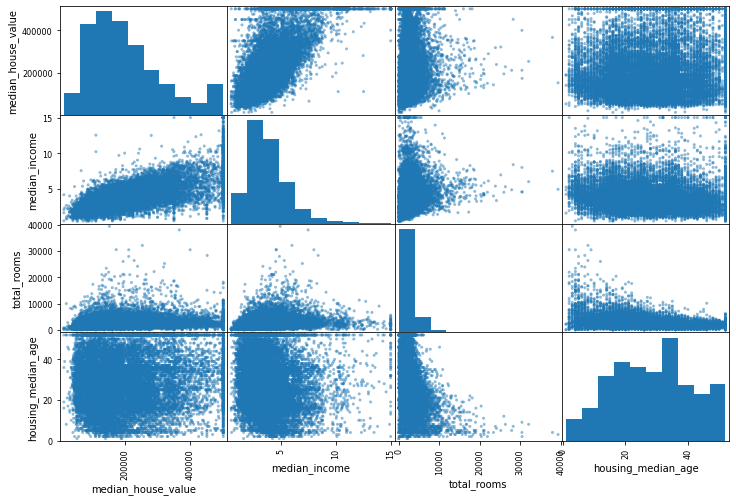

In [101]:
from pandas.plotting import scatter_matrix
attributes=['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attributes],figsize=(12,8))
plt.show()

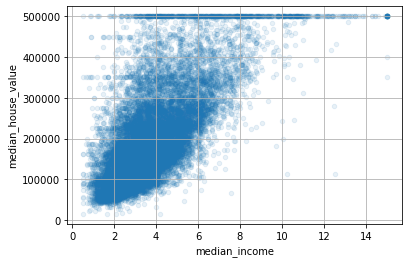

In [103]:
housing.plot(kind='scatter',x='median_income',y='median_house_value',alpha=0.1,grid=True)
plt.show()

Certain attribute combinations can provide more insight into relationships between attributes in a dataset

In [106]:
housing.households.head()

13096    1034.0
14973     357.0
3785      203.0
14689     780.0
20507    1172.0
Name: households, dtype: float64

In [107]:
housing['rooms_per_house']=housing['total_rooms']/housing['households']
housing['bedroom_ratio']=housing['total_bedrooms']/housing['total_rooms']
housing['people_per_house']=housing['population']/housing['households']

In [109]:
corr_matrix=housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedroom_ratio        -0.256397
Name: median_house_value, dtype: float64

# Prepare the data

In [110]:
housing=strat_train_set.drop('median_house_value',axis=1)
housing_labels=strat_train_set['median_house_value'].copy()

In [111]:
#impute the missing data
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')

We have seen earlier that the `total_bedrooms` attribute has some missing values, but if we deploy the system online, we cannot be sure that we will not encounter any missing values for other features. Simple Imputer can compute the specified statistic on only numerical attributes, hence we would have to remove the `ocean_proximity` attribute

In [112]:
housing_numerical=housing.select_dtypes(include=[np.number])#include only numerical attributes
imputer.fit(housing_numerical)#compute the specified statistic

SimpleImputer(strategy='median')

In [113]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [116]:
housing_numerical.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [120]:
housing_numerical.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16344 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


In [121]:
X=imputer.transform(housing_numerical)

In [125]:
housing_tr=pd.DataFrame(X,columns=housing_numerical.columns,index=housing_numerical.index)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 13096 to 19888
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
dtypes: float64(8)
memory usage: 1.1 MB


### Use sklearn's OrdinalEncoder class to convert the categorical attributes to numerical ones

In [130]:
housing_cat=housing[['ocean_proximity']]
housing_cat.shape

(16512, 1)

In [131]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded=ordinal_encoder.fit_transform(housing_cat)

In [132]:
housing_cat_encoded


array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [133]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### Often when we have categorical features, an ML algorithm can easily assume that two close-by categories are more similar than far away categories. To mitigate such problems we can one-hot encode the categorical attributes. This will result in binary attributes corresponding to each category

In [134]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder=OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)

In [135]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]